##### Copyright 2019 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [3]:
import os
os.getcwd()

'/content'

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os
os.listdir('/content/drive')
os.listdir('/content/drive/MyDrive/CNN_project')

['train.csv', 'test.csv', 'train_test_image.zip']

In [6]:
import os
import zipfile

local_zip = '/content/drive/MyDrive/CNN_project/train_test_image.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

In [14]:
# Number of training images in all alphabets
for i in os.listdir('./train'):
  image_dir = os.path.join('./train', i)
  print(f'total training {i} images: {len(os.listdir(image_dir))}')

total training K images: 4195
total training Q images: 4341
total training Y images: 8120
total training O images: 43162
total training G images: 4311
total training T images: 16909
total training J images: 6401
total training F images: 878
total training B images: 6548
total training Z images: 4548
total training D images: 7630
total training I images: 820
total training E images: 8638
total training W images: 8057
total training S images: 36349
total training R images: 8666
total training M images: 9270
total training C images: 17458
total training N images: 14385
total training V images: 3108
total training H images: 5401
total training L images: 8729
total training A images: 10414
total training P images: 14493
total training U images: 21818
total training X images: 4689


In [15]:
# Number of training images in all alphabets
for i in os.listdir('./test'):
  image_dir = os.path.join('./test', i)
  print(f'total training {i} images: {len(os.listdir(image_dir))}')

total training K images: 1408
total training Q images: 1471
total training Y images: 2739
total training O images: 14651
total training G images: 1451
total training T images: 5586
total training J images: 2092
total training F images: 285
total training B images: 2120
total training Z images: 1528
total training D images: 2504
total training I images: 300
total training E images: 2802
total training W images: 2727
total training S images: 12070
total training R images: 2900
total training M images: 3066
total training C images: 5951
total training N images: 4625
total training V images: 1074
total training H images: 1817
total training L images: 2857
total training A images: 3456
total training P images: 4848
total training U images: 7190
total training X images: 1583


In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Define callback function to stop training when model get 98% accuracy for both train and test
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.98 and logs.get('val_accuracy') > 0.95:
            print("\nReached 98% accuracy of training and 95% accuracy for validation so training is stop !")
            self.model.stop_training = True


# Model's layer definition
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation ="relu"),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(26, activation='softmax')
])

# Model Summary
print(model.summary())

# Compile the Model
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# declare callback function
callback = myCallback()


# Create Data_generator which get image directly from directory
# and label them according to its distinct directories for
# for both training and test data set

train_dir = './train'
test_dir = './test'

# rescale images
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.)


train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(28, 28),
        # all images are of single channel
        color_mode='grayscale',
        # load only 7351 image in one batch
        batch_size=7351,
        # use categorical crossenotropy loss, so need of categorical label
        class_mode='categorical'
    )

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(28, 28),
        # load only 2450 image in one batch
        batch_size=2450,
        # all images are of single channel
        color_mode='grayscale',
        # use categorical crossenotropy loss, so need of categorical label
        class_mode='categorical'
    )


# Fit the model
history = model.fit(
    train_generator,
    validation_data=test_generator,
    validation_steps=38,
    steps_per_epoch=38,
    epochs=25,
    callbacks=callback,
    verbose=1
    )

# Save the model
model.save('model')

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                102464    
_________________________________________________________________
dense_7 (Dense)              (None, 512)              

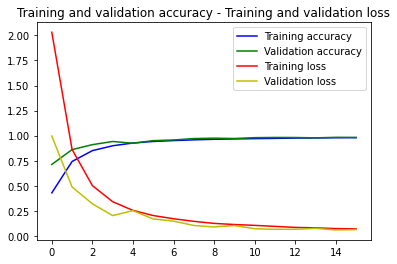

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation accuracy')
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'y', label='Validation loss')
plt.title('Training and validation accuracy - Training and validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()
plt.savefig('train_and_test_accuracy_loss_VS_Epochs.png')